In [1]:
# Importing the required libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../data/goodread_final_5596.csv')

In [5]:
# Removing NaN or None Rows
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
# df = df.dropna()

In [223]:
# Dropping Duplicate Books
# df = df.drop_duplicates(subset='title', keep="last")

In [7]:
df['url'] = df["url"].astype(str)
df['title'] = df["title"].astype(str)
df['author'] = df['author'].astype(str)
df['num_reviews'] = df['num_reviews'].astype(int)
df['num_ratings'] = df['num_ratings'].astype(int)
df['avg_rating'] = df['avg_rating'].astype(float)
df['num_pages'] = df['num_pages'].astype(int)
df['original_publish_year'] = df['original_publish_year'].astype(int)

In [9]:
# df["awards"] = df["awards"].apply(eval).str.len()
df["genres"] = df["genres"].apply(eval)
df["places"] = df["places"].apply(eval)

In [10]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    df_norm["minmax_norm_ratings"] = 1 + ((df_norm['avg_rating'] - df_norm['avg_rating'].min()) / (df_norm['avg_rating'].max() - df_norm['avg_rating'].min())) * 9
    return df_norm

# call the min_max_scaling function
df = min_max_normalization(df)

In [11]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def mean_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply mean scaling
    df_norm["mean_norm_ratings"] = 1 + ((df_norm['avg_rating'] - df_norm['avg_rating'].mean()) / (df_norm['avg_rating'].max() - df_norm['avg_rating'].min())) * 9
    return df_norm

# call the min_max_scaling function
df = mean_normalization(df)

In [13]:
df = df[(df.original_publish_year >= 2000) & (df.original_publish_year <= 2010)]

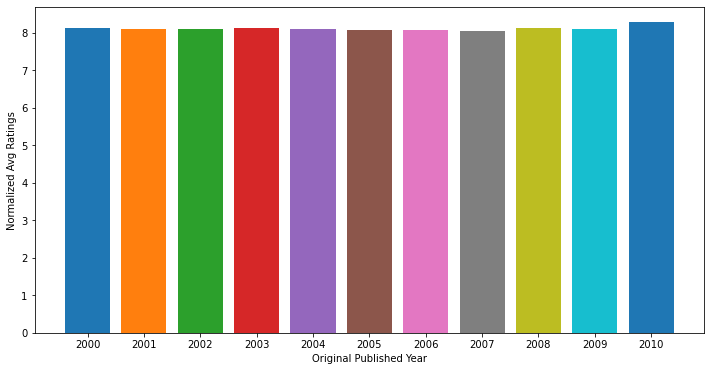

In [16]:
plt.figure(figsize=(12,6))
groups = df.groupby("original_publish_year")
for name, group in groups:
    plt.bar(group["original_publish_year"], group["minmax_norm_ratings"].mean())
    plt.xlabel("Original Published Year")
    plt.ylabel("Normalized Avg Ratings")
    plt.xticks(np.arange(2000,2011))

C:\Users\Ellefson\miniconda3\envs\ai-npl\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Name of the Authors')

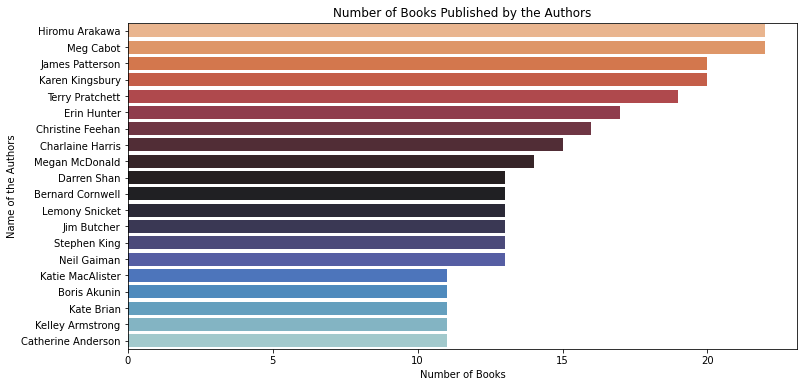

In [17]:
plt.figure(figsize=(12,6))
top_author=df['author'].value_counts()[:20]
sns.barplot(top_author.values, top_author.index, palette='icefire_r').set_title('Number of Books Published by the Authors')
plt.xlabel("Number of Books")
plt.ylabel("Name of the Authors")

In [245]:
top_author.index

Index(['J.K. Rowling', 'Suzanne Collins', 'Khaled Hosseini', 'Markus Zusak',
       'Audrey Niffenegger', 'Kathryn Stockett', 'Stephenie Meyer',
       'Sara Gruen', 'Stieg Larsson', 'Yann Martel'],
      dtype='object')

C:\Users\Ellefson\miniconda3\envs\ai-npl\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num_pages'>

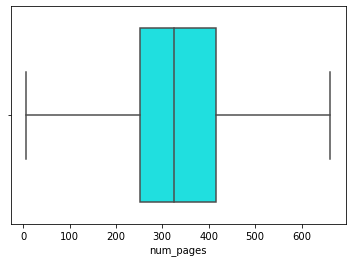

In [19]:
sns.boxplot("num_pages", data=df, palette=["cyan"],sym='')

C:\Users\Ellefson\miniconda3\envs\strive-ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Stephenie Meyer'),
  Text(1, 0, 'Suzanne Collins'),
  Text(2, 0, 'J.K. Rowling'),
  Text(3, 0, 'Rick Riordan'),
  Text(4, 0, 'John Green'),
  Text(5, 0, 'Khaled Hosseini'),
  Text(6, 0, 'Stieg Larsson'),
  Text(7, 0, 'Markus Zusak'),
  Text(8, 0, 'Cassandra Clare'),
  Text(9, 0, 'Neil Gaiman'),
  Text(10, 0, 'Dan Brown'),
  Text(11, 0, 'Brandon Sanderson'),
  Text(12, 0, 'Jodi Picoult'),
  Text(13, 0, 'Kathryn Stockett'),
  Text(14, 0, 'Stephen King')])

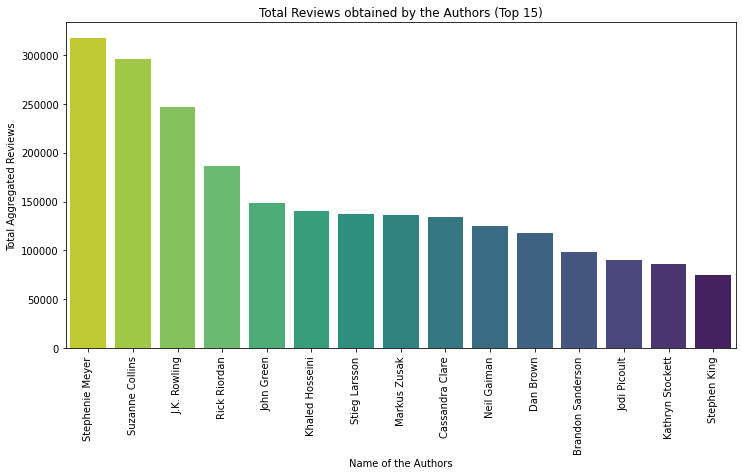

In [556]:
groups = df.groupby(['author'])['num_reviews'].agg('sum').sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(groups.index, groups.values, palette='viridis_r').set_title('Total Reviews obtained by the Authors (Top 15)')
plt.xlabel("Name of the Authors")
plt.ylabel("Total Aggregated Reviews")
plt.xticks(rotation=90)

In [476]:
my_genres = []
for ind, items in enumerate(df["genres"]):
    try:
        my_genres.append(items[0])
        my_genres.append(items[1])
        my_genres.append(items[2])
    except:
        my_genres.append("None")

In [477]:
my_genres

['Fantasy',
 'Young Adult',
 'Fiction',
 'Young Adult',
 'Fiction',
 'Science Fiction',
 'Fantasy',
 'Young Adult',
 'Fiction',
 'Fantasy',
 'Young Adult',
 'Fiction',
 'Fantasy',
 'Young Adult',
 'Fiction',
 'Historical',
 'Historical Fiction',
 'Fiction',
 'Fiction',
 'Romance',
 'Fantasy',
 'Fiction',
 'Historical',
 'Historical Fiction',
 'Fiction',
 'Historical',
 'Historical Fiction',
 'Fiction',
 'Historical',
 'Historical Fiction',
 'Young Adult',
 'Science Fiction',
 'Dystopia',
 'Young Adult',
 'Fantasy',
 'Romance',
 'Fiction',
 'Historical',
 'Historical Fiction',
 'Fiction',
 'Mystery',
 'Thriller',
 'Fiction',
 'Mystery',
 'Thriller',
 'Fiction',
 'Mystery',
 'Young Adult',
 'Fiction',
 'Science Fiction',
 'Science Fiction',
 'Fiction',
 'Mystery',
 'Young Adult',
 'Fiction',
 'Historical',
 'Historical Fiction',
 'Fiction',
 'Historical',
 'Historical Fiction',
 'Fantasy',
 'Young Adult',
 'Fiction',
 'Fiction',
 'Contemporary',
 'Womens Fiction',
 'Fantasy',
 'Young Adu

In [478]:
pie_genre = pd.DataFrame(my_genres, columns=["Genre"])

In [479]:
pie_genre

,Genre
0,Fantasy
1,Young Adult
2,Fiction
3,Young Adult
4,Fiction
...,...
16366,Historical Fiction
16367,Young Adult
16368,Mystery
16369,Thriller


Text(0, 0.5, '')

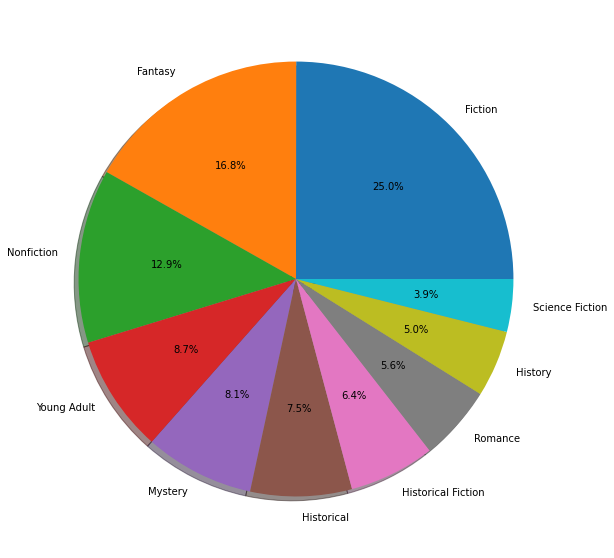

In [516]:
ax = pie_genre.groupby("Genre")["Genre"].count().nlargest(10).plot.pie(figsize=(15,10),autopct='%1.1f%%', shadow=True)
ax.set_ylabel('')

In [391]:
df.corr()

,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,awards,minmax_norm_ratings,mean_norm_ratings
num_reviews,1.000000,0.766559,-0.027013,-0.474200,0.533071,0.124129,0.901360,-0.027013,-0.027013
num_ratings,0.766559,1.000000,-0.070914,-0.175096,0.269590,0.575729,0.854751,-0.070914,-0.070914
avg_rating,-0.027013,-0.070914,1.000000,0.525330,0.219650,0.107775,-0.188735,1.000000,1.000000
num_pages,-0.474200,-0.175096,0.525330,1.000000,-0.387364,0.375783,-0.335309,0.525330,0.525330
original_publish_year,0.533071,0.269590,0.219650,-0.387364,1.000000,0.027412,0.237157,0.219650,0.219650
series,0.124129,0.575729,0.107775,0.375783,0.027412,1.000000,0.236379,0.107775,0.107775
awards,0.901360,0.854751,-0.188735,-0.335309,0.237157,0.236379,1.000000,-0.188735,-0.188735
minmax_norm_ratings,-0.027013,-0.070914,1.000000,0.525330,0.219650,0.107775,-0.188735,1.000000,1.000000
mean_norm_ratings,-0.027013,-0.070914,1.000000,0.525330,0.219650,0.107775,-0.188735,1.000000,1.000000


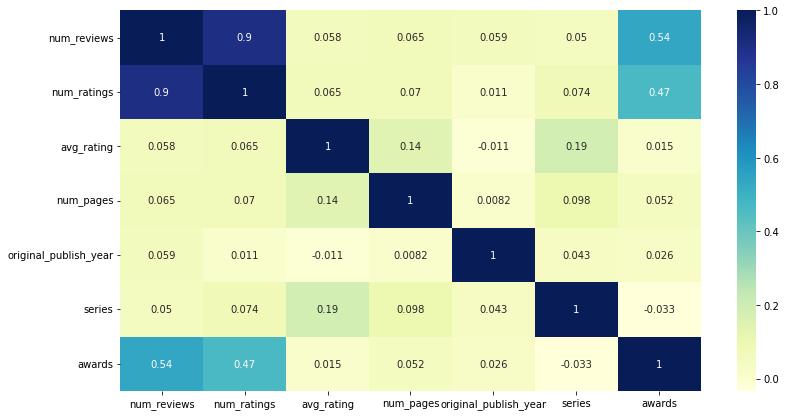

In [514]:
correlation = df.corr()
corr_features = correlation.index[:-2]
plt.figure(figsize=(13,7))
fig = sns.heatmap(df[corr_features].corr(), annot=True, cmap="YlGnBu")

In [ ]:
# X axis No of years Y axis No of reviews 
# Compare series of books published by the authors 
# Awards and Authors 

In [538]:
# Awards and Authors

author
Neil Gaiman         60
Suzanne Collins     52
Kate DiCamillo      52
China Miéville      46
Terry Pratchett     43
Scott Westerfeld    38
Stephenie Meyer     36
Shaun Tan           33
J.K. Rowling        31
Markus Zusak        28
Name: awards, dtype: int64

C:\Users\Ellefson\miniconda3\envs\strive-ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Name of the Authors')

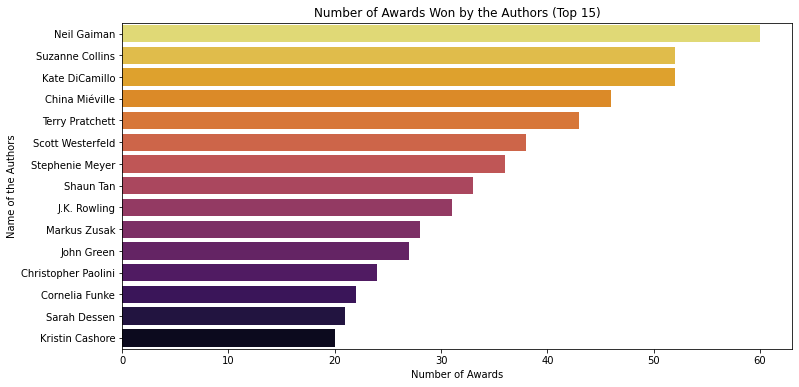

In [548]:
groups = df.groupby(['author'])['awards'].agg('sum').sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(groups.values, groups.index, palette='inferno_r').set_title('Number of Awards Won by the Authors (Top 15)')
plt.xlabel("Number of Awards")
plt.ylabel("Name of the Authors")

2000 561373
2001 582146
2002 508660
2003 915777
2004 586568
2005 1295032
2006 1260558
2007 1402305
2008 1601034
2009 1565306
2010 163943


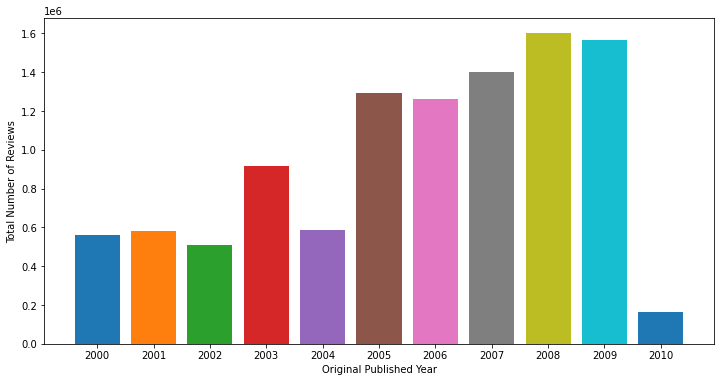

In [558]:
# No. of years and No. of Reviews

plt.figure(figsize=(12,6))
groups = df.groupby("original_publish_year")
for name, group in groups:
    print(name, group["num_reviews"].sum())
    plt.bar(group["original_publish_year"], group["num_reviews"].sum())
    plt.xlabel("Original Published Year")
    plt.ylabel("Total Number of Reviews")
    plt.xticks(np.arange(2000,2011))

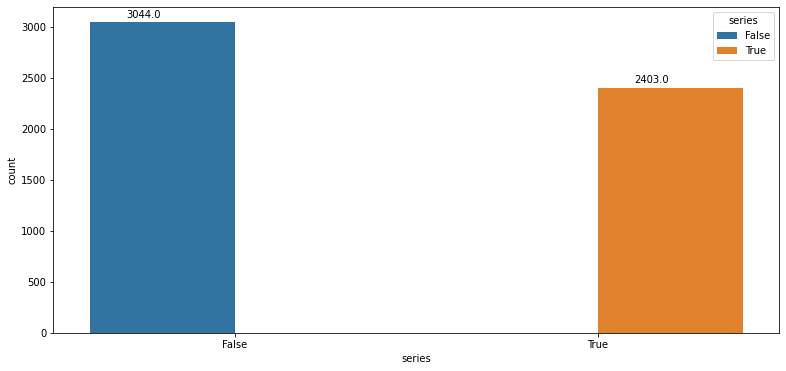

In [580]:
# CountPlot Series
plt.figure(figsize=(13,6))
ax = sns.countplot(x="series", hue="series", data=df)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

In [581]:
df

,url,title,author,num_reviews,num_ratings,avg_rating,num_pages,original_publish_year,series,genres,awards,places,minmax_norm_ratings,mean_norm_ratings
0,http://www.goodreads.com/book/show/136251.Harr...,Harry Potter and the Deathly Hallows,J.K. Rowling,71115,3093559,4.61,759,2007,True,"[Fantasy, Young Adult, Fiction]",8,"[London, England, Hogwarts School of Witchcraf...",9.298,2.205128
1,http://www.goodreads.com/book/show/2767052-the...,The Hunger Games,Suzanne Collins,179564,6998314,4.32,284,2008,True,"[Young Adult, Fiction, Science Fiction]",41,"[District 12, Panem, Capitol, Panem, Panem]",8.776,1.683128
2,http://www.goodreads.com/book/show/1.Harry_Pot...,Harry Potter and the Half-Blood Prince,J.K. Rowling,44399,2697998,4.57,652,2005,True,"[Fantasy, Young Adult, Fiction]",3,"[Hogwarts School of Witchcraft and Wizardry, E...",9.226,2.133128
3,http://www.goodreads.com/book/show/6.Harry_Pot...,Harry Potter and the Goblet of Fire,J.K. Rowling,52560,2888017,4.56,734,2000,True,"[Fantasy, Young Adult, Fiction]",9,"[Hogwarts School of Witchcraft and Wizardry, S...",9.208,2.115128
4,http://www.goodreads.com/book/show/2.Harry_Pot...,Harry Potter and the Order of the Phoenix,J.K. Rowling,48162,2782996,4.50,870,2003,True,"[Fantasy, Young Adult, Fiction]",9,"[Hogwarts School of Witchcraft and Wizardry, L...",9.100,2.007128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,http://www.goodreads.com/book/show/6738284-the...,The Language of Life: DNA and the Revolution i...,Francis S. Collins,69,637,3.99,368,2009,False,"[Science, Nonfiction, Biology]",0,[],8.182,1.089128
5592,http://www.goodreads.com/book/show/32706309-ea...,East End Tales,Gilda O'Neill,22,93,3.51,50,2002,False,[Nonfiction],0,[],7.318,0.225128
5593,http://www.goodreads.com/book/show/145342.How_...,How to Be a Girly Girl in Just Ten Days,Lisa Papademetriou,132,2948,4.05,163,2007,True,"[Childrens, Childrens, Middle Grade]",0,[],8.290,1.197128
5594,http://www.goodreads.com/book/show/470175.The_...,The Ransom of Mercy Carter,Caroline B. Cooney,180,1933,3.80,256,2000,False,"[Historical, Historical Fiction, Young Adult]",0,"[Canada, Deerfield, Massachusetts, Massachusetts]",7.840,0.747128


C:\Users\Ellefson\miniconda3\envs\strive-ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Books')

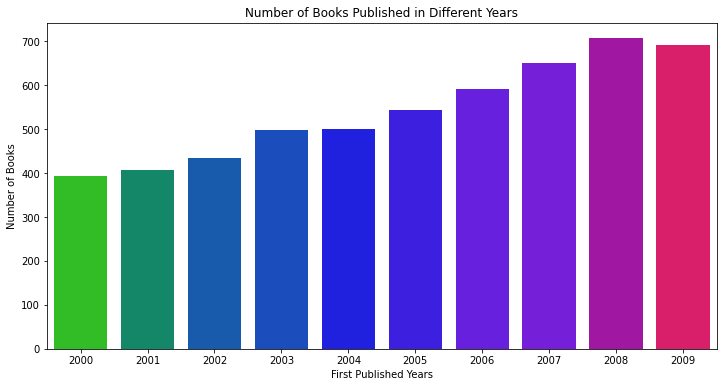

In [596]:
plt.figure(figsize=(12,6))
original_year =df['original_publish_year'].value_counts()[:10]
sns.barplot(original_year.index, original_year.values, palette='prism_r').set_title('Number of Books Published in Different Years')
plt.xlabel("First Published Years")
plt.ylabel("Number of Books")